#### Fig4 - mRNA dotplot
#### University of Cambridge
#### Mariana Quiroga Londoño
#### 10-02-20

In [1]:
#SETTING ENVIRONMENT 
import rpy2
#import tzlocal
#%load_ext rpy2.ipython

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save=1000)

2021-02-14 12:40:58,295 [11709] WARNING  py.warnings:110: [JupyterRequire] /usr/local/lib/python3.7/dist-packages/numba/core/cpu.py:77: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  numba.core.entrypoints.init_all()



In [2]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

In [3]:
!pip list 

Package                           Version
--------------------------------- --------------------
alabaster                         0.7.8
altair                            4.1.0
anndata                           0.7.4
annoy                             1.16.3
appdirs                           1.4.3
arrow                             0.15.5
atomicwrites                      1.3.0
attrs                             18.2.0
Babel                             2.6.0
backcall                          0.1.0
bash-kernel                       0.7.2
batchglm                          0.7.3
bbknn                             1.3.7
beautifulsoup4                    4.8.2
bioinfokit                        0.7.1
bioservices                       1.6.0
bleach                            3.1.0
bokeh                             1.4.0
boto3                             1.12.49
botocore                          1.15.49
cellrank                          1.0.0
certifi                           2020.6.20
cffi        

You should consider upgrading via the '/bin/python3 -m pip install --upgrade pip' command.


In [7]:
adata=sc.read("h5da_part4/050221_mq224_mRNA_Progenitors_only_postHarmony_ccfiltered_DEG_P4_sorted_annotations_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.h5ad")

In [5]:
HSC_MPPs =["AVP", "HOPX", "HLF", "AREG", "SPINK2", "ID1"]
MyP =["ENO1", "MPO", "ELANE", "AZU1", "CALR", "CEBPA"]
DC = ["IRF8", "IRF7", "TCF4", "RUNX2"]
LyP =["LTB", "BCL11A", "SOX4"] 
Ly_proB = ["DNTT", "EBF1", "LEF1"]
Ly_preB = ["IRF4", "CD19"]
MEP = ["GATA1", "GATA2", "SERPINB1", "CTNNBL1"]
MkP =["GP1BB", "PLEK", "RGS18", "PF4"]
early_Ery = ["CNRIP1", "KLF1", "TFRC", "TFR2", "APOE", "HPGDS"]
late_Ery =["HBG1", "HBG2", "HBA1", "GYPA", "GYPB", "CD36"]
EoBasoMast =["MS4A3", "HDC", "CPA3", "TPSAB1"]
markers=HSC_MPPs+MyP+DC+LyP+Ly_proB+Ly_preB+MEP+MkP+early_Ery+late_Ery+EoBasoMast 

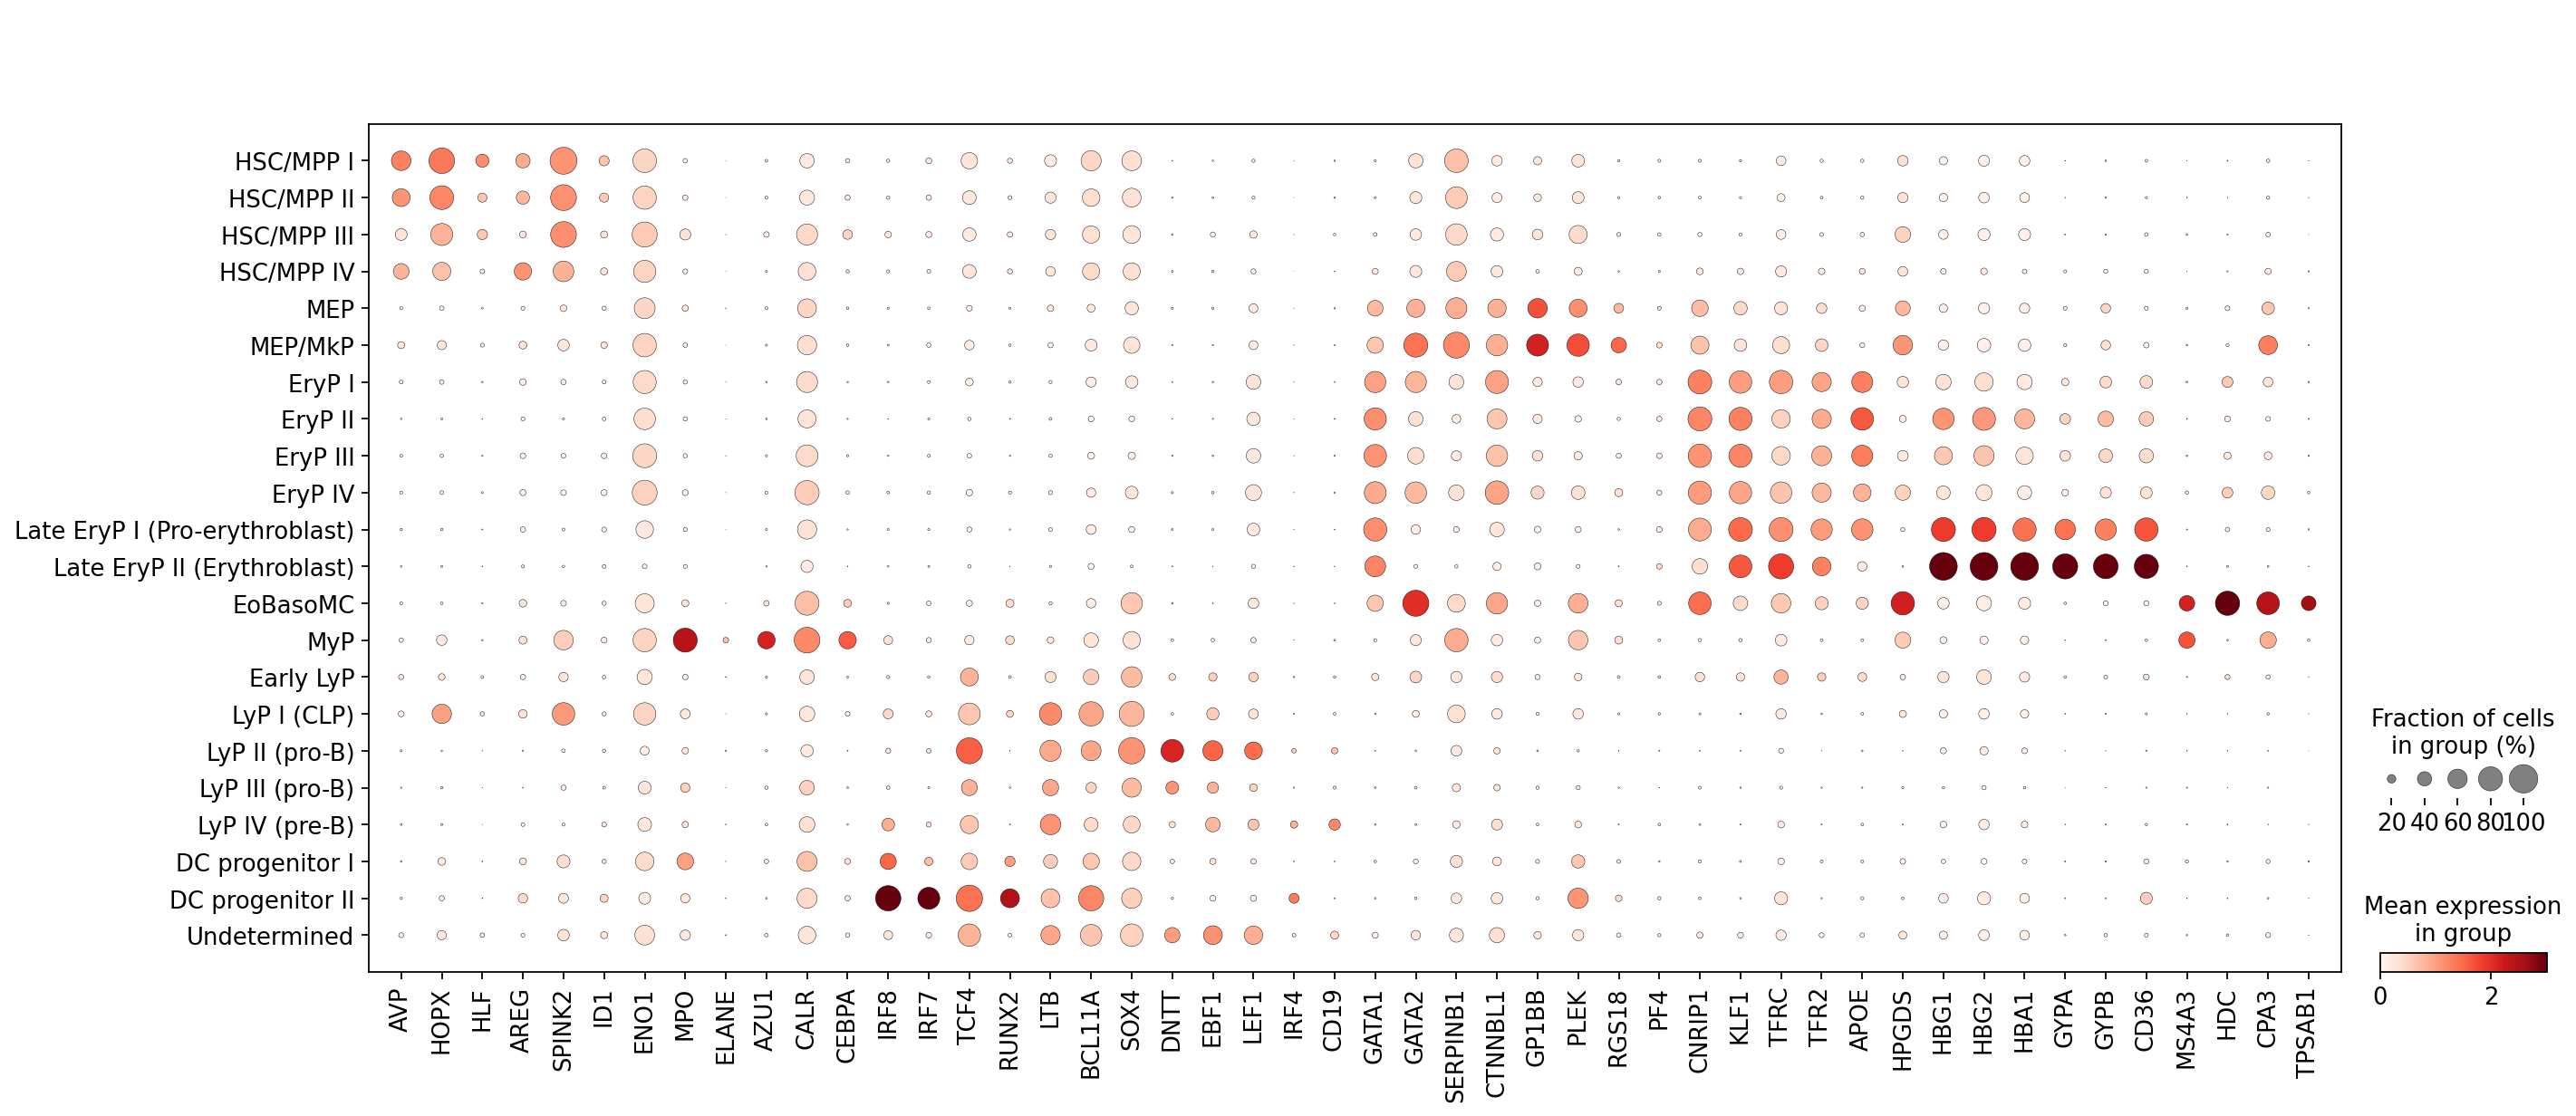

In [6]:
sc.pl.dotplot(adata,markers, groupby='Cell.labels.P4.sorted', vmax=3, save="110221_suplementaryfig_mRNAdotplot.pdf")

In [7]:
adata_sample = adata.obs.groupby(["Sample"]).apply(len)
adata_sample

Sample
SIGAA6    9146
SIGAA7    8335
SIGAC5    1423
SIGAE5    7392
SIGAF3     655
SIGAG7    7540
SIGAH3     782
dtype: int64

# Shorter list of markers

In [8]:
markers= pd.read_csv("../../ADT/dotplotsfig4.csv")

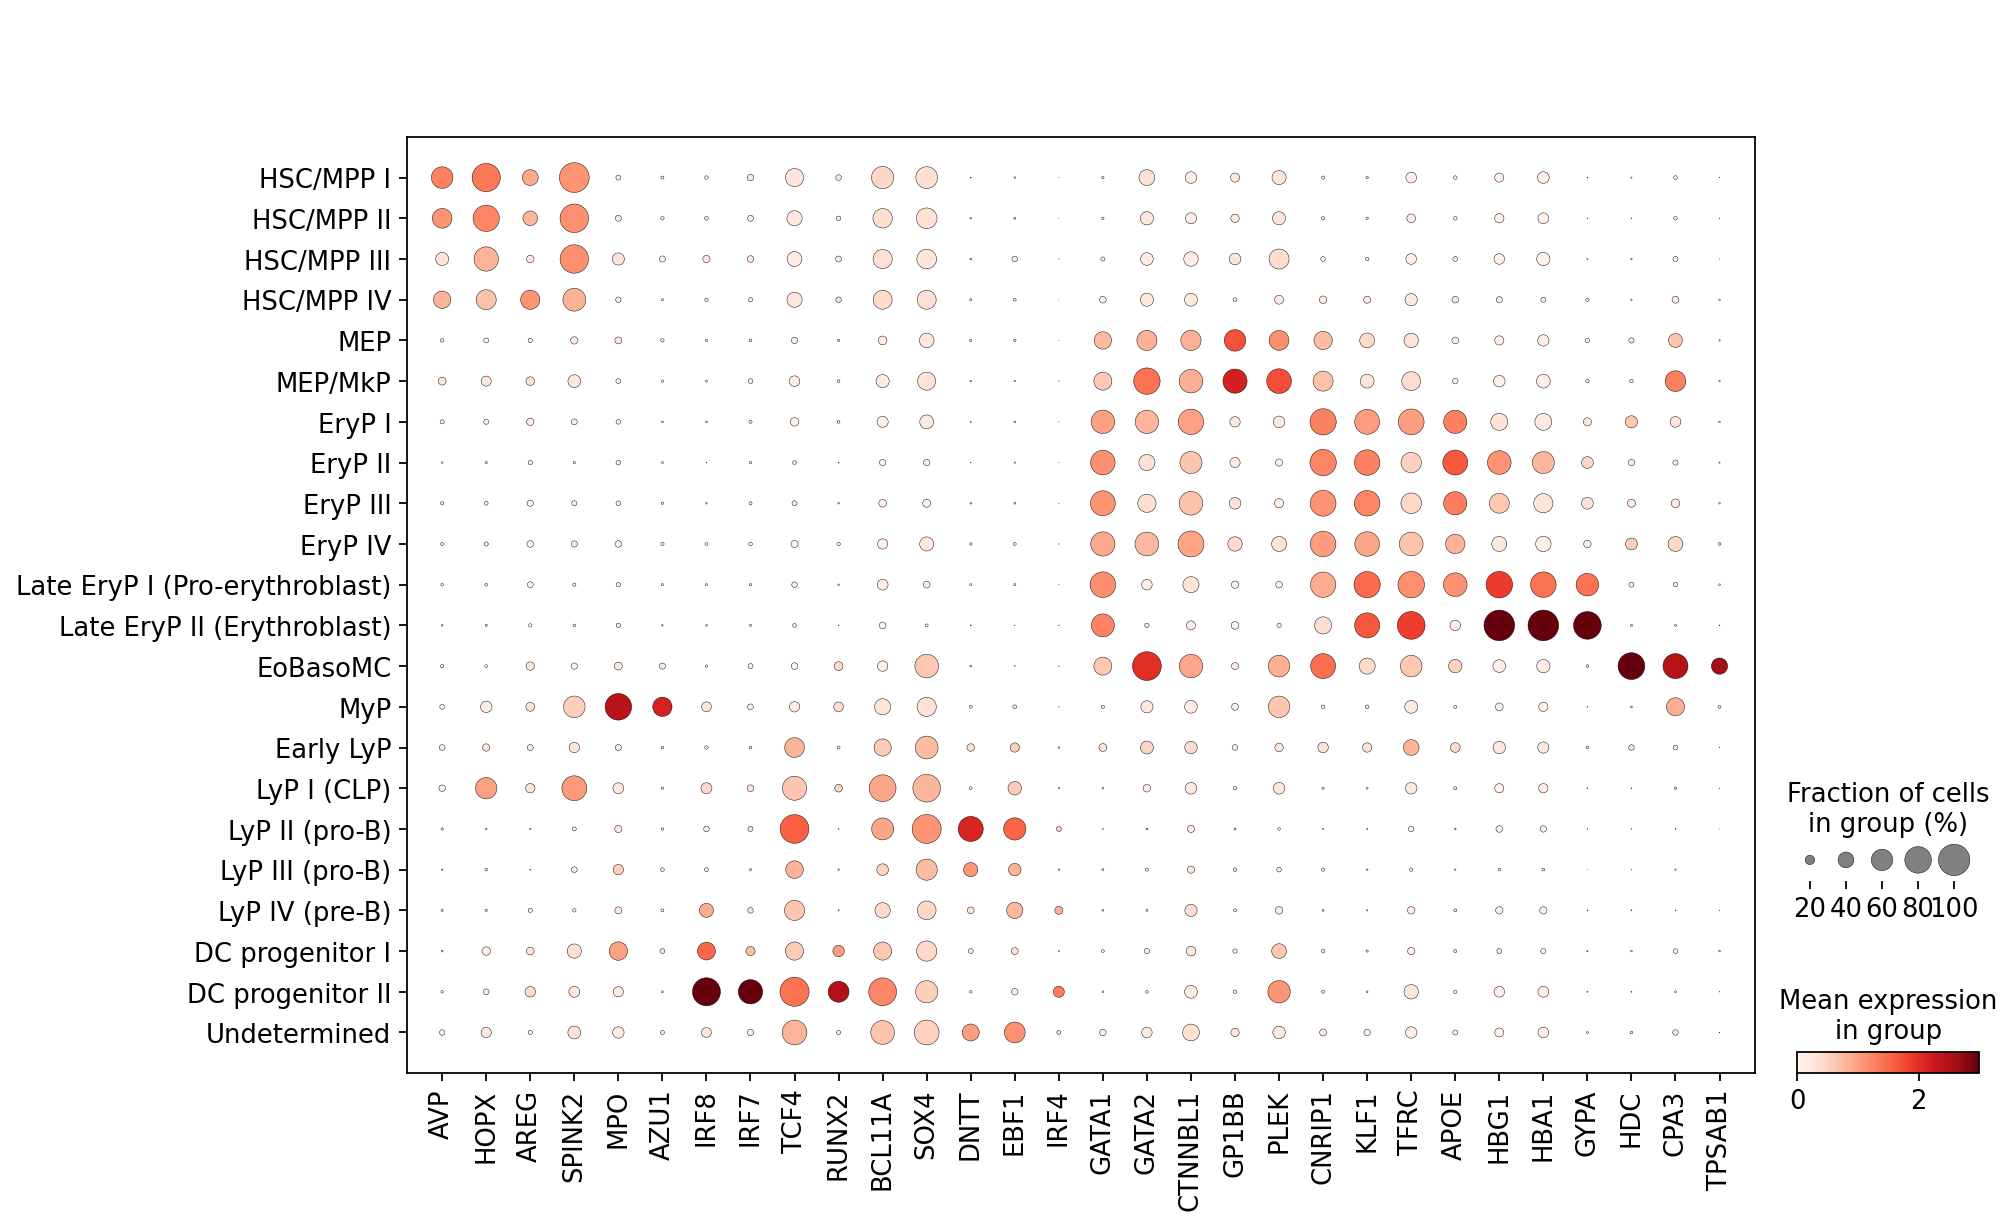

In [9]:
sc.pl.dotplot(adata,list(markers["GEX list trimmed to 30"]), groupby='Cell.labels.P4.sorted', vmax=3, save="140221_fig_shorterlistmarkers_mRNAdotplot.pdf")